# シンプルなRNNの実装

## 訓練用データの作成

RNNに用いる訓練用データを作成する

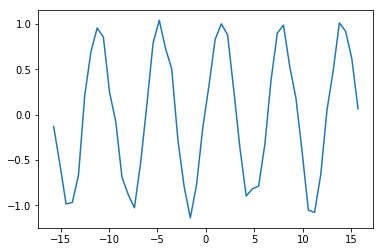

(40, 10, 1)
(40, 10, 1)


In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

PI = np.pi
x_data = np.linspace(-5*PI, 5*PI)
sin = np.sin(x_data) + 0.1 * np.random.randn(x_data.size)
plt.plot(x_data, sin)
plt.show()

n_rnn = 10
n_sample = x_data.size - n_rnn
offset = 1
x = np.zeros((n_sample, n_rnn))
t = np.zeros((n_sample, n_rnn))
for i in range(0, n_sample):
    x[i] = sin[i : i+n_rnn]
    t[i] = sin[i+offset : i+n_rnn+offset]

x = x.reshape(n_sample, n_rnn, 1)
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)
print(t.shape)


## Simple-RNNの構築

In [15]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

batch_size = 8
n_in = 1 # num of input layers
n_hidden = 20  # num of hidden layers
n_out = 1 # num of output layers

model = Sequential()

# add Simple RNN layer
model.add(SimpleRNN(n_hidden, input_shape=(n_rnn, n_in), return_sequences=True))
model.add(Dense(n_out, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='sgd')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 10, 20)            440       
_________________________________________________________________
dense_3 (Dense)              (None, 10, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


## 学習の実行

In [16]:
history = model.fit(x, t, epochs=20,  batch_size=batch_size, validation_split=0.1)

Train on 36 samples, validate on 4 samples
Epoch 1/20
36/36 [==============================] - 0s 11ms/step - loss: 0.6025 - val_loss: 0.4159
Epoch 2/20
36/36 [==============================] - 0s 564us/step - loss: 0.3261 - val_loss: 0.2372
Epoch 3/20
36/36 [==============================] - 0s 673us/step - loss: 0.1977 - val_loss: 0.1574
Epoch 4/20
36/36 [==============================] - 0s 830us/step - loss: 0.1399 - val_loss: 0.1216
Epoch 5/20
36/36 [==============================] - 0s 1ms/step - loss: 0.1131 - val_loss: 0.1044
Epoch 6/20
36/36 [==============================] - 0s 857us/step - loss: 0.0999 - val_loss: 0.0947
Epoch 7/20
36/36 [==============================] - 0s 709us/step - loss: 0.0926 - val_loss: 0.0891
Epoch 8/20
36/36 [==============================] - 0s 688us/step - loss: 0.0879 - val_loss: 0.0855
Epoch 9/20
36/36 [==============================] - 0s 903us/step - loss: 0.0847 - val_loss: 0.0826
Epoch 10/20
36/36 [==============================] - 0s 775u

## 学習の推移

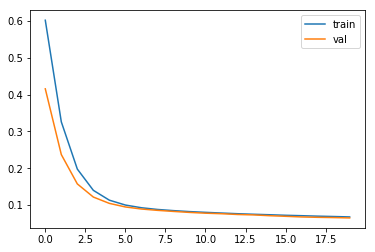

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss, label='train')
plt.plot(np.arange(len(val_loss)), val_loss, label='val')
plt.legend()
plt.show()

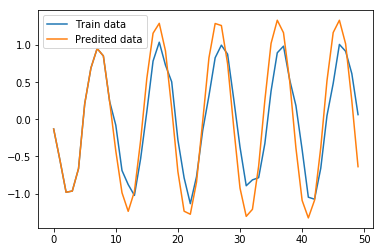

In [18]:
predicted = x[0].reshape(-1)

for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1)) # 直近のデータを使って予測
    predicted = np.append(predicted, y[0][n_rnn-1][0]) # 出力の最後の結果をpredictedに追加
    
plt.plot(np.arange(len(sin)), sin, label='Train data')
plt.plot(np.arange(len(predicted)),  predicted, label='Predited data')
plt.legend()
plt.show()